# Project Name: Bankruptcy Prediction
## The main aim of this project is to predict the bankruptcy of the companies based on various features in a given year.

### All the Lifecycle In A Data Science Project
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [1]:
# Importing the libraries that have been used in the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pdfkit
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

## 1. Data Analysis Phase

In [3]:
# Reading CSV file
import pdfkit
year = pd.read_csv('csv_result-5year.csv')
year
#year.savefig('data_matrix.png')

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.088238,0.55472,0.01134,1.0205,-66.52,0.34204,0.10949,0.57752,1.0881,0.32036,0.10949,0.1976,0.096885,0.10949,1475.2,0.24742,1.8027,0.10949,0.077287,50.1990,1.1574,0.13523,0.062287,0.41949,0.32036,0.20912,1.0387,0.026093,6.1267,0.377880,0.077287,155.33,2.3498,0.24377,0.13523,1.4493,571.37,0.32101,0.095457,0.12879,0.11189,0.095457,127.300,77.0960,0.45289,0.66883,54.621,0.10746,0.075859,1.0193,0.55407,0.42557,0.73717,0.73866,15182.0000,0.080955,0.27543,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0
1,2,-0.006202,0.48465,0.23298,1.5998,6.1825,0,-0.006202,1.0634,1.2757,0.51535,0.001329,-0.015967,0.037544,-0.006202,3693.4,0.098825,2.0634,-0.006202,-0.004862,59.9230,1.0158,0.001289,-0.004862,?,0.080285,0.098825,0.17118,0.61545,4.0022,0.363810,0.000778,108.05,3.3779,2.7075,-0.036475,1.2757,5.2519,0.5938,-0.028591,0.05781,0.29167,0.001011,171.380,111.4500,-0.029614,1.0606,58.258,-0.052809,-0.041395,1.2823,0.38846,0.29604,1.3614,1.5686,2341.8000,-0.028591,-0.012035,1.00470,0.15222,6.0911,3.2749,111.140,3.2841,3.37,0
2,3,0.13024,0.22142,0.57751,3.6082,120.04,0.18764,0.16212,3.059,1.1415,0.67731,0.16212,0.73218,0.165680,0.16212,431.75,0.84539,4.5164,0.16212,0.143490,41.5080,1.2362,0.14586,0.115280,0.23566,0.67731,0.70143,1.4737,2.8721,4.7622,0.050069,0.143490,81.653,4.4701,0.65878,0.14586,1.1698,?,0.67731,0.129100,1.3196,0.042587,0.129100,163.710,122.2000,1.0137,3.028,47.382,0.1208,0.106920,3.6082,0.22142,0.22371,3.3684,3.3684,33401.0000,0.123960,0.19229,0.87604,0,8.7934,2.987,71.531,5.1027,5.6188,0
3,4,-0.089951,0.887,0.26927,1.5222,-55.992,-0.073957,-0.089951,0.1274,1.2754,0.113,-0.080792,-0.17445,0.084038,-0.089951,3020.5,0.12084,1.1274,-0.089951,-0.070525,47.6980,1.0942,0,-0.070525,?,0.064737,0.12084,0,1.2519,4.0153,0.657790,-0.138650,253.91,1.4375,0.83567,0.014027,1.2754,1.9005,0.4383,0.010998,0.45622,0.14998,0.000000,157.300,109.6000,-0.53969,1.199,82.073,-0.19714,-0.154560,0.88491,0.51564,0.69565,0.52538,2.0378,2789.6000,0.418840,-0.79602,0.59074,2.8787,7.6524,3.3302,147.560,2.4735,5.9299,0
4,5,0.048179,0.55041,0.10765,1.2437,-22.959,0,0.05928,0.81682,1.515,0.44959,0.09199,0.13419,0.055575,0.05928,2386.1,0.15297,1.8168,0.05928,0.039129,36.0740,0.99455,0.067616,0.031802,0,0.4292,0.1328,2.0671,0.23891,5.8823,0.363310,0.039129,140.12,2.6583,2.1336,0.3642,1.515,6.3783,0.51225,0.240400,0.067283,0.19828,0.044632,125.210,89.1340,0.32177,0.90475,46.538,0.042701,0.028186,0.99819,0.44176,0.37618,0.99779,1.1369,1.2437,0.240400,0.10716,0.77048,0.13938,10.118,4.095,106.430,3.4294,3.3622,0
5,6,0.23156,0.51047,0.47291,1.9393,15.102,0,0.28769,0.95899,1.7915,0.48953,0.33362,0.57139,0.166890,0.28769,623.17,0.58572,1.959,0.28769,0.160590,79.2250,1.2748,0.32983,0.129260,?,0.48616,0.47576,7.1814,20.047,4.1709,0.173100,0.166790,125.72,2.9033,2.8637,0.32968,1.7915,84.275,0.4965,0.184030,0.44404,0.04988,0.184110,153.380,74.1570,0.5955,1.167,97.092,0.31854,0.177800,1.9128,0.5035,0.34443,20.751,21.047,7008.8000,0.184030,0.47303,0.83996,0.014242,4.6071,4.922,102.580,3.5581,75.941,0
6,7,0.099486,0.59991,0.37489,1.6529,19.036,0.21084,0.12395,0.6669,1.0972,0.40009,0.12395,0.21587,0.082929,0.12395,1638.2,0.22281,1.6669,0.12395,0.076897,66.7830,1.2422,0.13452,0.061722,0.2644,0.40009,0.18204,0.91571,7.3601,4.2136,0.371590,0.076897,142.66,2.5586,0.22424,0.13452,1.6118,25.411,0.42583,0.083460,0.006603,0.13673,0.083460,214.060,147.2700,0.33734,1.1393,73.273,0.1248,0.077428,1.582,0.57417,0.39084,7.8547,8.3601,6131.0000,0.088581,0.24866,0.91142,0.064344,5.4655,2.4784,130.020,2.8072,31.645,0
7,8,0.078518,0.20546,0.10

In [4]:
# Before Droping the ID column checking the shape of the dataset

print("Before Droping Coloumn ID")
print()
print("Data Shape(Rows * Cols)",year.shape)

Before Droping Coloumn ID

Data Shape(Rows * Cols) (5910, 66)


In [5]:
# Droping the ID column it is of no use

year_data = year.drop(['id'], axis=1)


In [6]:
# After Droping the ID column checking the shape of the dataset

print("After Droping Coloumn ID")
print()
print("Data Shape(Rows * Cols)",year_data.shape)


After Droping Coloumn ID

Data Shape(Rows * Cols) (5910, 65)


### Splitting my data into feature and target variable

In [7]:
# Fetching the target coloumns from the data set

target = year_data['class']



In [8]:
# Fetching the features coloumns from the data set

features_year = year_data.iloc[:,0:64]


#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables if present
5. Cardinality of Categorical Variables if present
6. Outliers
7. Relationship between independent and dependent feature(class)

### 1. Missing Values

### Since in the data inplace of missing values there is 0 and ? marks though dataset is showing zero missing 
### values. So, replacing 0 and ? with the 0 values using np.nan where np is the alias for numpy library.

In [9]:
# Checking for the missing value before replacing with the  0 and ? marks in the data set

features_with_na=[features for features in year_data.columns if year_data[features].isnull().sum()>1]
print(features_with_na)



[]


In [10]:
features_year.replace('0', np.nan, inplace= True)
features_year.replace('?', np.nan, inplace= True)

In [11]:
print('Dataframe info before conversion\n',features_year.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 64 columns):
Attr1     5870 non-null object
Attr2     5891 non-null object
Attr3     5906 non-null object
Attr4     5888 non-null object
Attr5     5896 non-null object
Attr6     3633 non-null object
Attr7     5902 non-null object
Attr8     5891 non-null object
Attr9     5909 non-null object
Attr10    5906 non-null object
Attr11    5902 non-null object
Attr12    5888 non-null object
Attr13    5910 non-null float64
Attr14    5902 non-null object
Attr15    5892 non-null object
Attr16    5892 non-null object
Attr17    5891 non-null object
Attr18    5902 non-null object
Attr19    5910 non-null float64
Attr20    5910 non-null float64
Attr21    5807 non-null object
Attr22    5366 non-null object
Attr23    5910 non-null float64
Attr24    5760 non-null object
Attr25    5904 non-null object
Attr26    5887 non-null object
Attr27    5129 non-null object
Attr28    5802 non-null object
Attr29    5907 non-nu

In [12]:
features_year = features_year.astype(float)


In [13]:
print('Dataframe info after conversion\n',features_year.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 64 columns):
Attr1     5870 non-null float64
Attr2     5891 non-null float64
Attr3     5906 non-null float64
Attr4     5888 non-null float64
Attr5     5896 non-null float64
Attr6     3633 non-null float64
Attr7     5902 non-null float64
Attr8     5891 non-null float64
Attr9     5909 non-null float64
Attr10    5906 non-null float64
Attr11    5902 non-null float64
Attr12    5888 non-null float64
Attr13    5910 non-null float64
Attr14    5902 non-null float64
Attr15    5892 non-null float64
Attr16    5892 non-null float64
Attr17    5891 non-null float64
Attr18    5902 non-null float64
Attr19    5910 non-null float64
Attr20    5910 non-null float64
Attr21    5807 non-null float64
Attr22    5366 non-null float64
Attr23    5910 non-null float64
Attr24    5760 non-null float64
Attr25    5904 non-null float64
Attr26    5887 non-null float64
Attr27    5129 non-null float64
Attr28    5802 non-null float

### Checking for the missing value after replacing with the  0 and ? marks in the data set

In [14]:
# Here we will check the percentage of nan values present in each feature
# 1 -step make the list of features which has missing values

features_with_na_Year=[features for features in features_year.columns 
                       if features_year[features].isnull().sum()>1]

# 2- step print the feature name and the percentage of missing values

print("_________________CHECKING PERCENTAGE MISSING VALUES IN A YEAR _________________")
for feature in features_with_na_Year:
    print(feature, np.round(features_year[feature].isnull().mean(), 4),  ' % missing values')


_________________CHECKING PERCENTAGE MISSING VALUES IN A YEAR _________________
Attr1 0.0068  % missing values
Attr2 0.0032  % missing values
Attr3 0.0007  % missing values
Attr4 0.0037  % missing values
Attr5 0.0024  % missing values
Attr6 0.3853  % missing values
Attr7 0.0014  % missing values
Attr8 0.0032  % missing values
Attr10 0.0007  % missing values
Attr11 0.0014  % missing values
Attr12 0.0037  % missing values
Attr14 0.0014  % missing values
Attr15 0.003  % missing values
Attr16 0.003  % missing values
Attr17 0.0032  % missing values
Attr18 0.0014  % missing values
Attr21 0.0174  % missing values
Attr22 0.092  % missing values
Attr24 0.0254  % missing values
Attr25 0.001  % missing values
Attr26 0.0039  % missing values
Attr27 0.1321  % missing values
Attr28 0.0183  % missing values
Attr29 0.0005  % missing values
Attr32 0.0115  % missing values
Attr33 0.0095  % missing values
Attr34 0.0091  % missing values
Attr35 0.0051  % missing values
Attr36 0.0005  % missing values
Attr

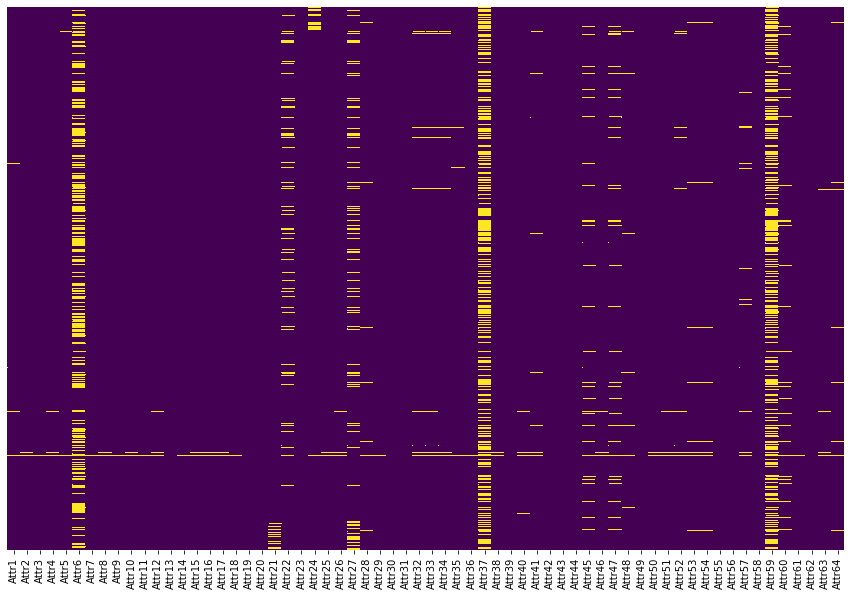

In [15]:
plt.subplots(figsize=(15,10)) # Width,Height
sns.heatmap(features_year.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### By Analysing the heat map we conclude there is so many missing values in the all year dataset 

1. Attr37 having the maximium missing value.
2. Second Highest missig values Attr6 and Attr59
4. Apart from that All attribute which are having yellow color having average of missing values
5. And the purpule color shows no missing values

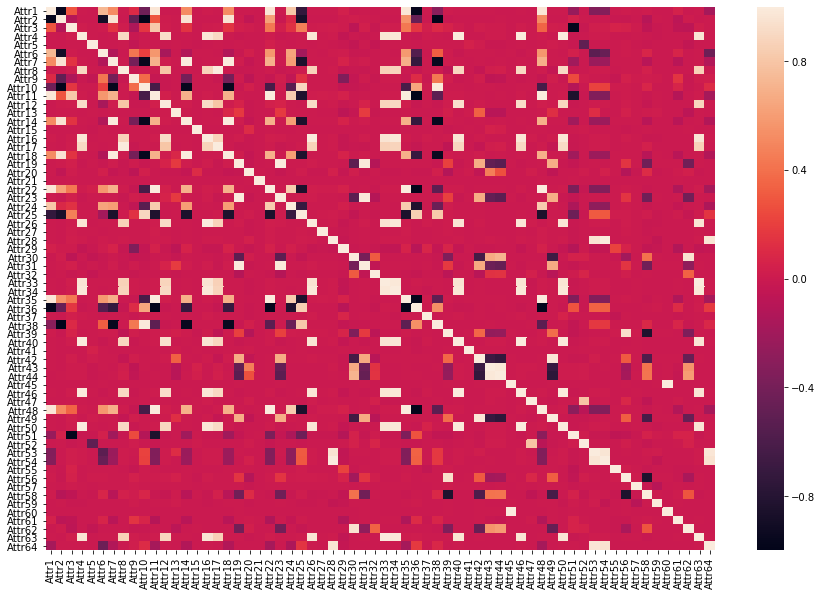

In [16]:
corr = features_year.corr()
# plot the heatmap
plt.subplots(figsize=(15,10)) # Width,Height
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)


### Since they are many missing values, we need to find the relationship between missing values and target (class) Let's plot some diagram for this relationship.


In [17]:
# list of numerical variables

numerical_features_1 = [feature for feature in features_year.columns if features_year[feature].dtypes]
print('Number of numerical variables: ', len(numerical_features_1))

# visualise the numerical variables
#features_year[numerical_features].head()

Number of numerical variables:  64


In [18]:
continuous_feature=[feature for feature in numerical_features_1]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 64


### ANALYISING THE DISTRIBUTION OF DATA SET USING HISTOGRAM HISTOGRAM

C:\Users\ilike\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


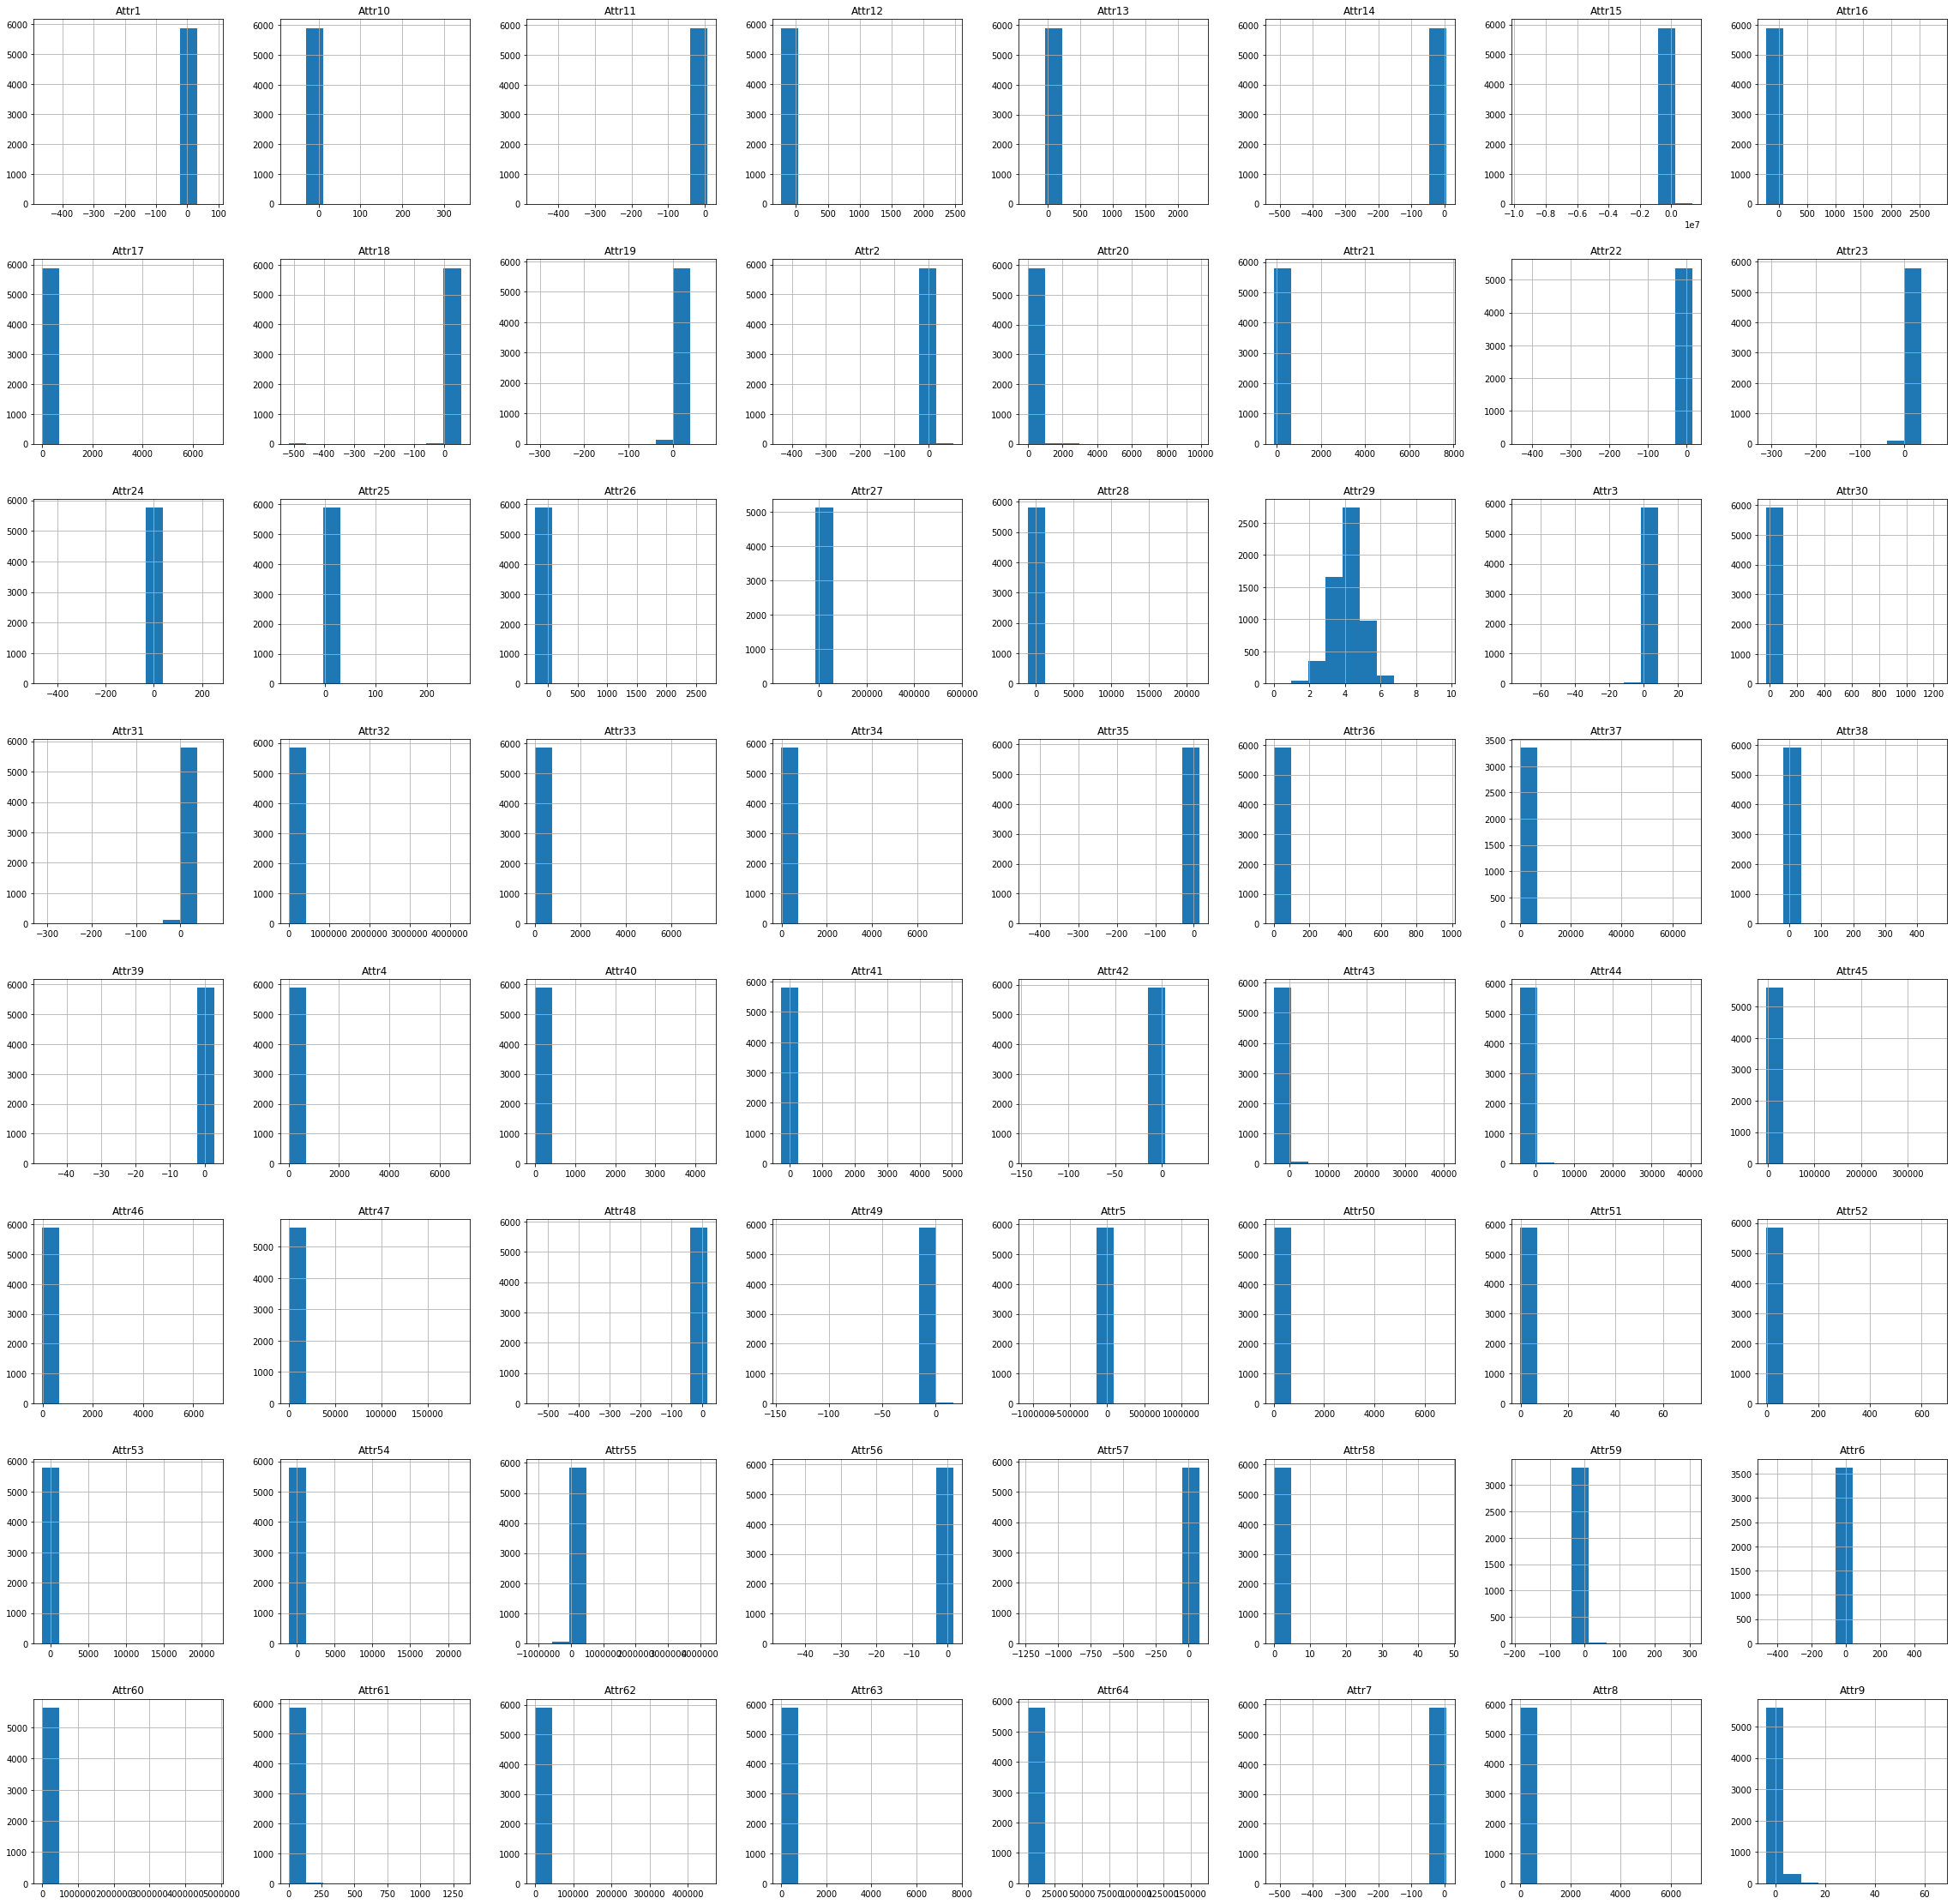

In [19]:
fig = plt.figure(figsize = (40,40))
ax = fig.gca()
features_year.hist(ax=ax)
plt.show()

### ANALYISING THE OUTLIER OF DATA SET USING BOXPLOT

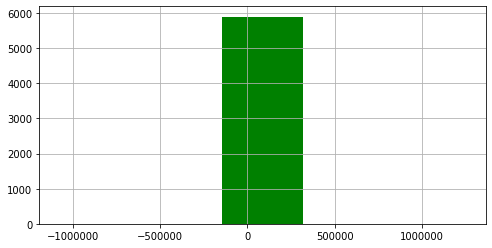

In [20]:
features_year['Attr5'].hist(color='green',bins=5,figsize=(8,4))

C:\Users\ilike\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
C:\Users\ilike\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
C:\Users\ilike\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
C:\Users\ilike\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
C:\Users\ilike\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
C:\Users\ilike\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
C:\Users\ilike\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
C:\Users\ilike\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
C:\Users\ilike\Anaconda3\lib\site-packag

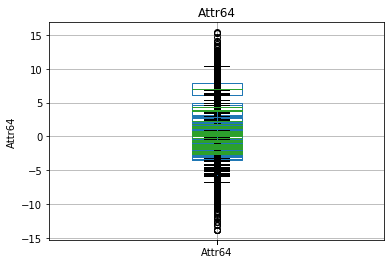

In [21]:
for feature in continuous_feature:
    data=features_year.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        #plt.savefig('foo_v001.png')
        #plt.savefig('foo.png')
        

### Removing Outliers from the dataset

Q1 = features_year.quantile(0.25)
Q3 = features_year.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

print(features_year < (Q1 - 1.5 * IQR)) |(features_year > (Q3 + 1.5 * IQR))

features_year = features_year[~((features_year < (Q1 - 1.5 * IQR)) |
                                (features_year > (Q3 + 1.5 * IQR))).any(axis=1)]
features_year.shape

 ### Imputing missing values we will replace by using median since there are outliers

In [22]:
## We will replace by using median since there are outliers

features_year.fillna(features_year.median(), inplace=True)
   

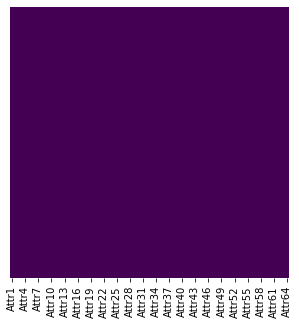

In [23]:
plt.subplots(figsize=(5,5)) # Width,Height
sns.heatmap(features_year.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### From above heatmap vizulazation its clearly showing that after impuating now there is no missing value

### Feature Scaling 

In [24]:
feature_scale=[feature for feature in features_year.columns]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(features_year[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
scaler.transform(features_year[feature_scale])


array([[8.41532746e-01, 8.57215818e-01, 7.17890302e-01, ...,
        8.39849684e-04, 5.36449577e-04, 4.41650994e-05],
       [8.41361457e-01, 8.57076593e-01, 7.20097806e-01, ...,
        7.69834532e-04, 6.31610498e-04, 4.48623898e-05],
       [8.41608926e-01, 8.56553570e-01, 7.23529277e-01, ...,
        6.82129593e-04, 8.69558596e-04, 5.90787700e-05],
       ...,
       [8.41047957e-01, 8.58607829e-01, 7.15028535e-01, ...,
        9.84020669e-04, 4.31658731e-04, 8.64766579e-05],
       [8.41175263e-01, 8.57591787e-01, 7.17931227e-01, ...,
        7.07795173e-04, 7.76451884e-04, 2.96000739e-05],
       [8.41181593e-01, 8.57179198e-01, 7.17323407e-01, ...,
        8.26763360e-04, 5.50894463e-04, 4.12128361e-05]])

### Feature Selection 

1. Apply Feature Selection
2. First, I specify the Lasso Regression model, and
3. I select a suitable alpha (equivalent of penalty).
4. The bigger the alpha the less features that will be selected.
5. Then I use the SelectFromModel object from sklearn 
6. Which will select the features which coefficients are non-zero

In [26]:
# For feature slection
# Remember to set the seed, the random state in this function
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(features_year, target)


C:\Users\ilike\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.69204956992263, tolerance: 0.038155668358714034
  positive)


SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [27]:
feature_sel_model.get_support()

array([False, False,  True,  True, False, False, False,  True, False,
       False, False,  True,  True, False, False,  True, False,  True,
       False,  True,  True, False, False, False,  True, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False, False,  True, False,  True, False, False, False,  True,
        True])

In [28]:
# let's print the number of total and selected features
# this is how we can make a list of the selected features

selected_feat = features_year.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((features_year.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
#print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 64
selected features: 31


In [29]:
selected_feat

Index(['Attr3', 'Attr4', 'Attr8', 'Attr12', 'Attr13', 'Attr16', 'Attr18',
       'Attr20', 'Attr21', 'Attr25', 'Attr28', 'Attr29', 'Attr31', 'Attr33',
       'Attr34', 'Attr35', 'Attr36', 'Attr39', 'Attr40', 'Attr41', 'Attr42',
       'Attr43', 'Attr45', 'Attr46', 'Attr52', 'Attr53', 'Attr54', 'Attr57',
       'Attr59', 'Attr63', 'Attr64'],
      dtype='object')

In [30]:
features_year = features_year[selected_feat]
print(features_year.head())

     Attr3   Attr4    Attr8    Attr12    Attr13    Attr16    Attr18  Attr20  \
0  0.01134  1.0205  0.57752  0.197600  0.096885  0.247420  0.109490  50.199   
1  0.23298  1.5998  1.06340 -0.015967  0.037544  0.098825 -0.006202  59.923   
2  0.57751  3.6082  3.05900  0.732180  0.165680  0.845390  0.162120  41.508   
3  0.26927  1.5222  0.12740 -0.174450  0.084038  0.120840 -0.089951  47.698   
4  0.10765  1.2437  0.81682  0.134190  0.055575  0.152970  0.059280  36.074   

    Attr21    Attr25    Attr28  Attr29    Attr31  Attr33   Attr34    Attr35  \
0  1.15740  0.320360  0.026093  6.1267  0.077287  2.3498  0.24377  0.135230   
1  1.01580  0.080285  0.615450  4.0022  0.000778  3.3779  2.70750 -0.036475   
2  1.23620  0.677310  2.872100  4.7622  0.143490  4.4701  0.65878  0.145860   
3  1.09420  0.064737  1.251900  4.0153 -0.138650  1.4375  0.83567  0.014027   
4  0.99455  0.429200  0.238910  5.8823  0.039129  2.6583  2.13360  0.364200   

   Attr36    Attr39    Attr40    Attr41    Attr42 

In [31]:
## Training and Predicting

x1=features_year
y1=target


### APPLYING MODELS 

### 1. LOGISTIC REGRESSION

In [32]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=0)
x1_train.shape

(4137, 31)

In [33]:
model_LR= LogisticRegression()
model_LR.fit(x1_train,y1_train)

C:\Users\ilike\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# This will give you positive class prediction probabilities 
y_prob = model_LR.predict_proba(x1_test)[:,1]  

# This will threshold the probabilities to give class predictions.
y_pred = np.where(y_prob > 0.5, 1, 0)

model_LR.score(x1_test, y_pred)

1.0

In [35]:
y_score1_logistic = model_LR.predict_proba(x1_test)[:,1]

In [36]:
Logistic_cv_score = cross_val_score(model_LR, x1, y1, cv=10, scoring='roc_auc')

C:\Users\ilike\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ilike\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [37]:
y_score1_logistic = y_score1_logistic.round()
print("=== Confusion Matrix ===\n")
print(confusion_matrix(y1_test, y_score1_logistic))
print('\n')
print("=== Classification Report ===\n")
print(classification_report(y1_test, y_score1_logistic))
print('\n')
print("=== All AUC Scores ===\n")
print(Logistic_cv_score)
print('\n')
print("=== Mean AUC Score ===\n")
print("Mean AUC Score - Logistic: ", Logistic_cv_score.mean())

=== Confusion Matrix ===

[[1658    7]
 [ 106    2]]


=== Classification Report ===

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1665
           1       0.22      0.02      0.03       108

    accuracy                           0.94      1773
   macro avg       0.58      0.51      0.50      1773
weighted avg       0.90      0.94      0.91      1773



=== All AUC Scores ===

[0.84292683 0.80177384 0.79605322 0.60337029 0.72829268 0.68922395
 0.71161863 0.81494457 0.7686918  0.74953437]


=== Mean AUC Score ===

Mean AUC Score - Logistic:  0.7506430155210643


In [38]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.763819374930486

Text(0.5, 0, 'False Positive Rate')

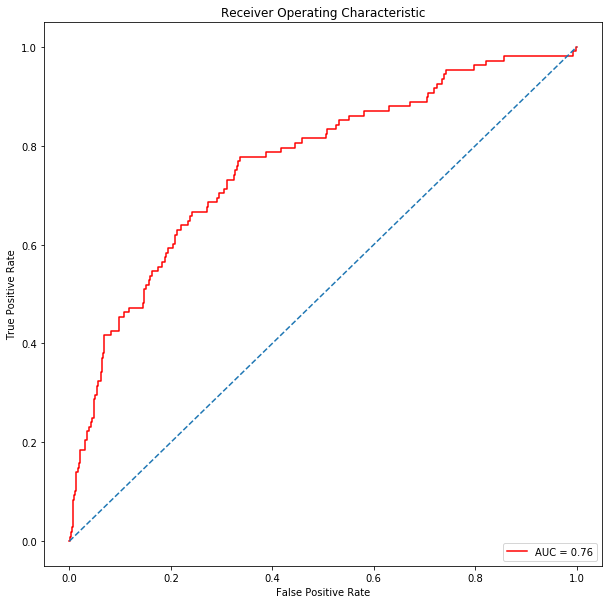

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### 2. DECISION TREE

In [41]:
# Create feature matrix and target vector
from sklearn.tree import DecisionTreeClassifier

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x1,y1, test_size=0.3)

In [42]:
# Create classifier
clf1 = DecisionTreeClassifier();

# Train model
clf1.fit(x1_train, y1_train); 

# Get predicted probabilities
y_score1 = clf1.predict_proba(x1_test)[:,1]

In [43]:
decision_tree_cv_score = cross_val_score(clf1, x1, y1, cv=10, scoring='roc_auc')

In [44]:
y_score1 = y_score1.round()
print("=== Confusion Matrix ===")
print(confusion_matrix(y1_test, y_score1))
print('\n')
print("=== Classification Report ===")
print(classification_report(y1_test, y_score1))
print('\n')
print("=== All AUC Scores ===")
print(decision_tree_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Decission Tree: ", decision_tree_cv_score.mean())

=== Confusion Matrix ===
[[1561  104]
 [  67   41]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1665
           1       0.28      0.38      0.32       108

    accuracy                           0.90      1773
   macro avg       0.62      0.66      0.64      1773
weighted avg       0.92      0.90      0.91      1773



=== All AUC Scores ===
[0.64527716 0.58884701 0.70314856 0.60815965 0.65110865 0.69170732
 0.60232816 0.67330377 0.59558758 0.63709534]


=== Mean AUC Score ===
Mean AUC Score - Decission Tree:  0.6396563192904656


In [48]:
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates
false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test, y_score1)
roc_auc_dt = auc(false_positive_rate, true_positive_rate)
roc_auc_dt

0.6585835835835836

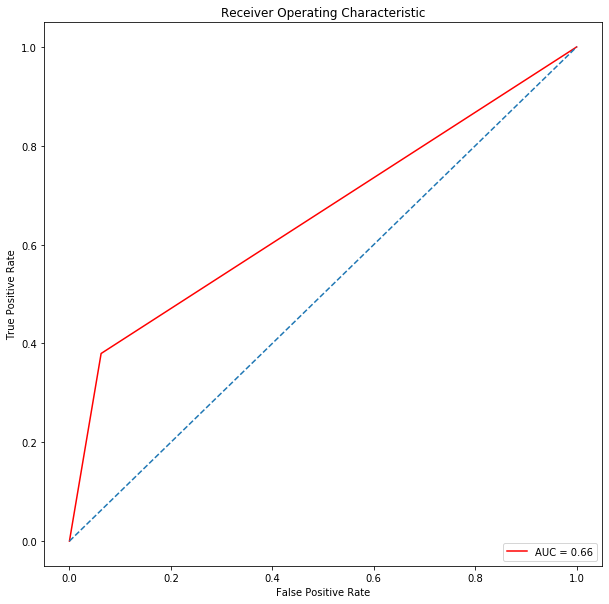

In [52]:
# Plot ROC curves
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_dt)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 3. Random Forest 

In [53]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc_model = RandomForestClassifier()
rfc_model.fit(x1_train,y1_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
# predictions
rfc_predict = rfc_model.predict(x1_test)

# Probabilities
rfc_probs = rfc_model.predict_proba(x1_test)[:, 1]

In [55]:
rfc_cv_score = cross_val_score(rfc_model, x1, y1, cv=10, scoring='roc_auc')

In [56]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y1_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y1_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[1647   18]
 [  88   20]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1665
           1       0.53      0.19      0.27       108

    accuracy                           0.94      1773
   macro avg       0.74      0.59      0.62      1773
weighted avg       0.92      0.94      0.93      1773



=== All AUC Scores ===
[0.88241685 0.88689579 0.86283814 0.79312639 0.86059867 0.81104213
 0.75017738 0.8616408  0.90031042 0.87676275]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8485809312638581


In [57]:
from sklearn.metrics import roc_curve, auc
false_positive_rate_rf, true_positive_rate_rf, thresholds = roc_curve(y1_test, rfc_probs)
auc_roc_rf = auc(false_positive_rate_rf, true_positive_rate_rf)
auc_roc_rf

0.8456984762540318

Text(0.5, 0, 'False Positive Rate')

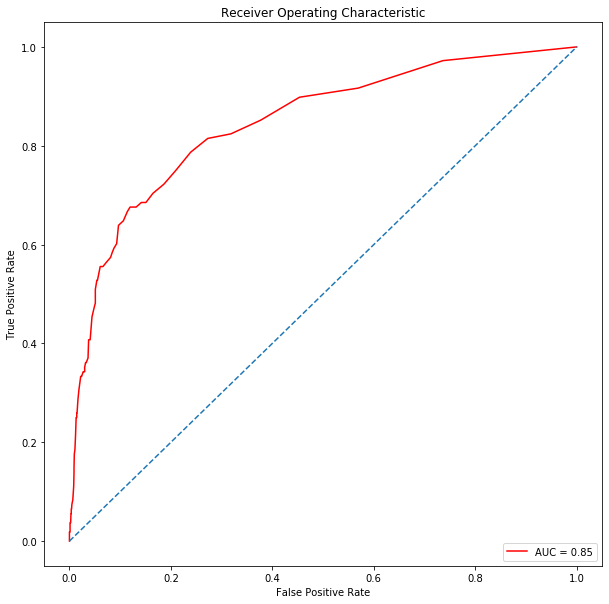

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_rf,true_positive_rate_rf, color='red',label = 'AUC = %0.2f' % auc_roc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### 4.  Naive bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(x1_train, y1_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
y_prob_navie = model_naive.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred_navie = np.where(y_prob_navie > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_naive.score(x1_test, y_pred_navie)

0.9419063733784546

In [61]:
print("Number of mislabeled points from %d points : %d"
% (x1_test.shape[0],(y1_test!= y_pred_navie).sum()))

Number of mislabeled points from 1773 points : 1623


In [62]:
navie_cv_score = cross_val_score(model_naive, x1, y1, cv=10, scoring='roc_auc')

In [63]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y1_test, y_pred_navie))
print('\n')
print("=== Classification Report ===")
print(classification_report(y1_test, y_pred_navie))
print('\n')
print("=== All AUC Scores ===")
print(navie_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Navie Bayes: ", navie_cv_score.mean())

=== Confusion Matrix ===
[[  46 1619]
 [   4  104]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.03      0.05      1665
           1       0.06      0.96      0.11       108

    accuracy                           0.08      1773
   macro avg       0.49      0.50      0.08      1773
weighted avg       0.87      0.08      0.06      1773



=== All AUC Scores ===
[0.76252772 0.81645233 0.73374723 0.65095344 0.72682927 0.64784922
 0.72594235 0.72062084 0.74638581 0.76321508]


=== Mean AUC Score ===
Mean AUC Score - Navie Bayes:  0.7294523281596452


In [64]:
from sklearn.metrics import roc_curve, auc
false_positive_rate_navie, true_positive_rate_navie, thresholds = roc_curve(y1_test, y_prob_navie)
auc_roc_navie = auc(false_positive_rate_navie, true_positive_rate_navie)
auc_roc_navie

0.47997441886330766

Text(0.5, 0, 'False Positive Rate')

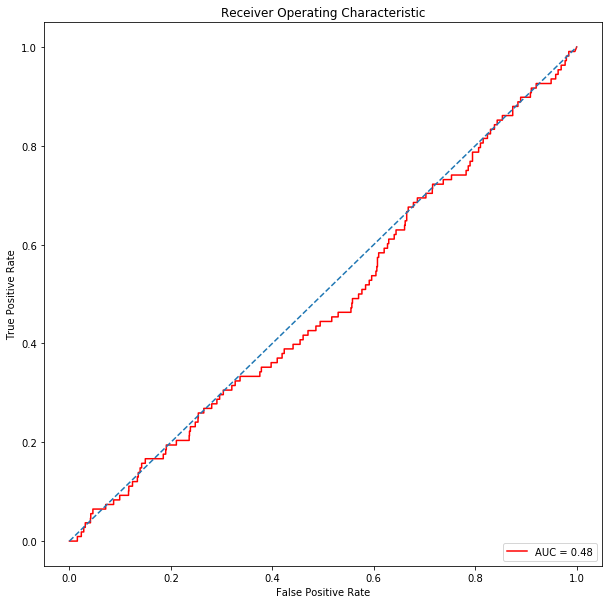

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_navie,true_positive_rate_navie, color='red',label = 'AUC = %0.2f' % auc_roc_navie)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### 5. Support Vector Machine

In [66]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

svm_model= SVC()

In [67]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
svm_model_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
svm_model_grid.fit(x1_train, y1_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.926, total=   3.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.926, total=   2.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.927, total=   3.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.927, total=   2.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.927, total=   3.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.926, total=   2.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.926, total=   2.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.927, total=   2.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.927, total=   2.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.912, total=   1.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.914, total=   1.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.915, total=   1.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.914, total=   1.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.918, total=   1.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.925, total=   0.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.919, total=   0.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.902, total=   1.5s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.906, total=   1.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.926, total=   2.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.918, total=   2.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.923, total=   1.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.925, total=   2.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.933, total=   2.0s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [68]:
# print best parameter after tuning 
print(svm_model_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(svm_model_grid.best_estimator_) 



{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [69]:
y_pred_svm= svm_model_grid.predict(x1_test)
print(metrics.accuracy_score(y_pred_svm,y1_test))

0.9390862944162437


In [70]:
svm_cv_score = cross_val_score(svm_model_grid, x1, y1, cv=10, scoring='roc_auc')

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   5.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   5.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.931, total=   5.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   4.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   3.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   4.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   4.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.922, total=   1.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.918, total=   1.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.916, total=   1.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.912, total=   1.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.917, total=   1.8s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.921, total=   1.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.923, total=   1.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.901, total=   2.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.922, total=   2.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.930, total=   3.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.922, total=   3.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.916, total=   3.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.939, total=   2.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.938, total=   3.8s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  6.0min finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   5.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.931, total=   5.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   4.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   3.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   4.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   3.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.928, total=   1.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.921, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.922, total=   1.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.918, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.919, total=   1.8s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.923, total=   1.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.925, total=   1.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.908, total=   2.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.913, total=   2.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.929, total=   3.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.924, total=   3.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.914, total=   2.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.937, total=   3.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.934, total=   3.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  5.9min finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.931, total=   4.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   4.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   4.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   3.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   3.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.924, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.921, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.920, total=   1.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.917, total=   1.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.918, total=   1.8s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.920, total=   1.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.928, total=   1.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.904, total=   2.3s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.912, total=   2.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.930, total=   3.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.919, total=   3.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.914, total=   2.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.937, total=   2.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.931, total=   3.9s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  5.9min finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.931, total=   4.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   3.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   4.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   3.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   3.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.923, total=   2.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.922, total=   2.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.918, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.920, total=   1.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.921, total=   1.9s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.924, total=   1.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.924, total=   1.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.909, total=   2.5s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.910, total=   2.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.930, total=   3.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.924, total=   3.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.907, total=   2.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.935, total=   3.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.935, total=   3.8s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  5.8min finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.931, total=   4.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   3.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   4.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   4.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   4.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.924, total=   1.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.924, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.914, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.916, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.915, total=   1.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.925, total=   1.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.928, total=   1.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.909, total=   2.2s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.903, total=   2.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.930, total=   3.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.927, total=   3.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.907, total=   2.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.932, total=   2.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.930, total=   4.2s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  5.8min finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.931, total=   4.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   3.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   3.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   3.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   4.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.923, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.922, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.913, total=   1.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.919, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.913, total=   1.8s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.920, total=   1.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.926, total=   1.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.897, total=   2.2s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.911, total=   2.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.927, total=   3.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.930, total=   3.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.921, total=   2.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.937, total=   2.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.938, total=   3.2s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  5.9min finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.931, total=   4.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   3.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   4.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   3.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   4.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.927, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.920, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.916, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.913, total=   1.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.915, total=   1.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.926, total=   1.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.929, total=   1.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.891, total=   2.3s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.913, total=   2.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.930, total=   3.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.928, total=   3.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.919, total=   2.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.925, total=   2.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.940, total=   2.8s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  5.8min finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   5.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.931, total=   5.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   4.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   4.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   4.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   4.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.921, total=   1.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.926, total=   1.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.919, total=   1.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.913, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.915, total=   1.8s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.923, total=   1.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.931, total=   1.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.888, total=   2.2s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.912, total=   2.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.930, total=   3.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.931, total=   3.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.923, total=   2.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.917, total=   1.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.937, total=   1.4s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  5.7min finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   2.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   1.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   1.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.931, total=   1.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=120.0min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   2.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   2.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   1.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.925, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.922, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.914, total=   0.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.920, total=   0.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.918, total=   0.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.922, total=   0.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.928, total=   0.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.893, total=   2.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.910, total=   2.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.930, total=   3.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.927, total=   3.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.921, total=   3.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.924, total=   2.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.932, total=   3.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 668.8min finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   5.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   5.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   5.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.930, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.931, total=   4.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   3.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   3.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   3.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.930, total=   3.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.924, total=   1.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.920, total=   1.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.915, total=   1.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.917, total=   1.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.915, total=   1.8s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.918, total=   1.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.927, total=   1.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.895, total=   2.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.899, total=   2.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.935, total=   3.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.926, total=   3.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.923, total=   3.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.914, total=   3.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.939, total=   3.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  5.8min finished


In [71]:
print("=== Confusion Matrix ===\n")
print(confusion_matrix(y1_test, y_pred_svm))
print('\n')
print("=== Classification Report ===\n")
print(classification_report(y1_test, y_pred_svm))
print('\n')
print("=== All AUC Scores ===\n")
print(svm_cv_score)
print('\n')
print("=== Mean AUC Score ===\n")
print("Mean AUC Score - SVM: ", svm_cv_score.mean())

=== Confusion Matrix ===

[[1665    0]
 [ 108    0]]


=== Classification Report ===

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1665
           1       0.00      0.00      0.00       108

    accuracy                           0.94      1773
   macro avg       0.47      0.50      0.48      1773
weighted avg       0.88      0.94      0.91      1773



=== All AUC Scores ===

[0.61578714 0.58046563 0.55662971 0.53028825 0.55121951 0.61658537
 0.53995565 0.60492239 0.56543237 0.61113082]


=== Mean AUC Score ===

Mean AUC Score - SVM:  0.5772416851441242


C:\Users\ilike\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
from sklearn.metrics import roc_curve, auc
false_positive_rate_svm, true_positive_rate_svm, thresholds = roc_curve(y_test, y_pred)
auc_roc_svm = auc(false_positive_rate_svm, true_positive_rate_svm)
auc_roc_svm

0.49725943970767356

Text(0.5, 0, 'False Positive Rate')

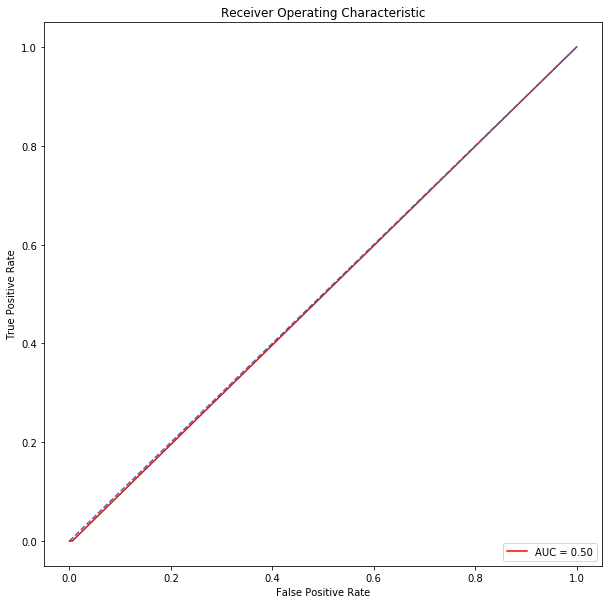

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_svm,true_positive_rate_svm, color='red',label = 'AUC = %0.2f' % auc_roc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


### 6. K Nearest Neighbors

In [74]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [75]:
y_pred_Knn = classifier.predict(X_test)

In [76]:
y_prob_knn = classifier.predict_proba(x1_test)[:,1] 

In [77]:
KNN_cv_score = cross_val_score(model_naive, x1, y1, cv=10, scoring='roc_auc')


In [78]:
print("=== Confusion Matrix ===\n")
print(confusion_matrix(y1_test, y_pred_Knn))
print('\n')
print("=== Classification Report ===\n")
print(classification_report(y1_test, y_pred_Knn))
print('\n')
print("=== All AUC Scores ===\n")
print(KNN_cv_score)
print('\n')
print("=== Mean AUC Score ===\n")
print("Mean AUC Score - KNN: ", KNN_cv_score.mean())

=== Confusion Matrix ===

[[1647   18]
 [ 107    1]]


=== Classification Report ===

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1665
           1       0.05      0.01      0.02       108

    accuracy                           0.93      1773
   macro avg       0.50      0.50      0.49      1773
weighted avg       0.89      0.93      0.91      1773



=== All AUC Scores ===

[0.76252772 0.81645233 0.73374723 0.65095344 0.72682927 0.64784922
 0.72594235 0.72062084 0.74638581 0.76321508]


=== Mean AUC Score ===

Mean AUC Score - KNN:  0.7294523281596452


In [102]:
from sklearn.metrics import roc_curve, auc
false_positive_rate_knn, true_positive_rate_knn, thresholds = roc_curve(y_test, y_prob_knn)
auc_roc_Knn = auc(false_positive_rate_knn, true_positive_rate_knn)
auc_roc_Knn

0.504683824418183

Text(0.5, 0, 'False Positive Rate')

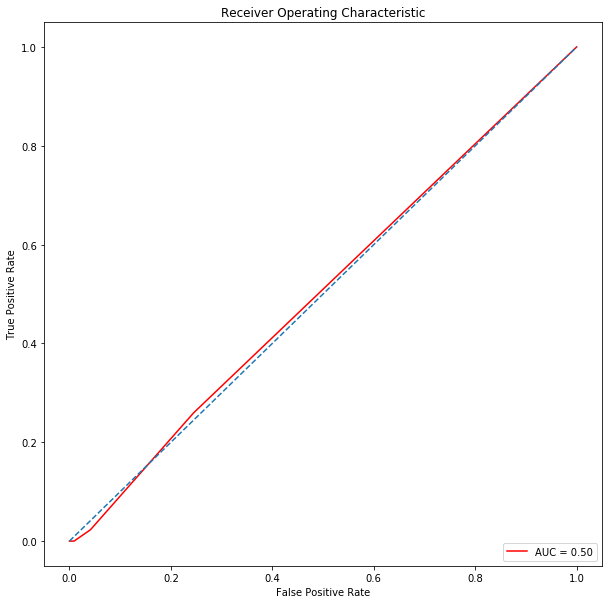

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_knn,true_positive_rate_knn, color='red',label = 'AUC = %0.2f' % auc_roc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


### 7. AdaBoost Classifier 

In [90]:
from sklearn.ensemble import AdaBoostClassifier

In [91]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)

# Train Adaboost Classifer
model_adaboost = abc.fit(x1_train, y1_train)

In [92]:
#Predict the response for test dataset
y_pred_adaBoost = model_adaboost.predict(x1_test)

y_prob_adaBoost = model_adaboost.predict_proba(x1_test)[:,1] 

In [93]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_adaBoost))

Accuracy: 0.8990411731528483


In [97]:
adaboost_cv_score = cross_val_score(model_naive, x1, y1, cv=10, scoring='roc_auc')

ValueError: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=7.

In [98]:
print("=== Confusion Matrix ===\n")
print(confusion_matrix(y1_test, y_pred_adaBoost))
print('\n')
print("=== Classification Report ===\n")
print(classification_report(y1_test, y_pred_adaBoost))
print('\n')
print("=== All AUC Scores ===\n")
print(adaboost_cv_score)
print('\n')
print("=== Mean AUC Score ===\n")
print("Mean AUC Score - AdaBoost: ", adaboost_cv_score.mean())

=== Confusion Matrix ===

[[1643   22]
 [  72   36]]


=== Classification Report ===

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1665
           1       0.62      0.33      0.43       108

    accuracy                           0.95      1773
   macro avg       0.79      0.66      0.70      1773
weighted avg       0.94      0.95      0.94      1773



=== All AUC Scores ===

[nan nan nan nan nan nan nan]


=== Mean AUC Score ===

Mean AUC Score - AdaBoost:  nan


In [99]:
from sklearn.metrics import roc_curve, auc
false_positive_rate_ada, true_positive_rate_ada, thresholds = roc_curve(y_test, y_prob_adaBoost)
auc_roc_ada = auc(false_positive_rate_ada, true_positive_rate_ada)
auc_roc_ada

0.4973198761517792

Text(0.5, 0, 'False Positive Rate')

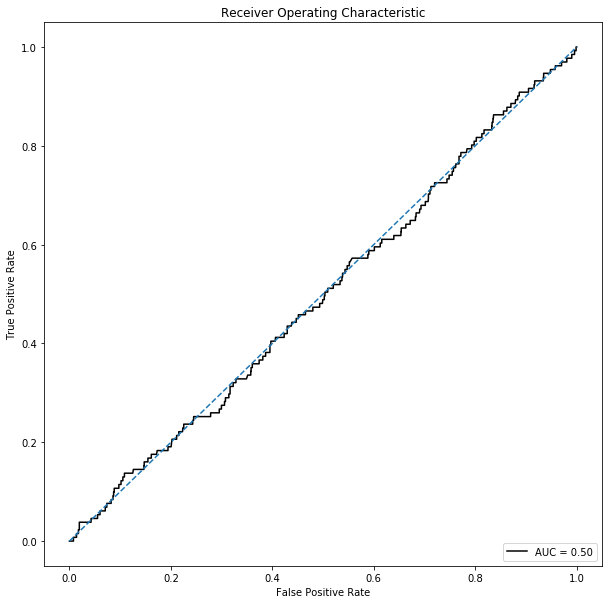

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_ada,true_positive_rate_ada, color='black',label = 'AUC = %0.2f' % auc_roc_ada)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


## Evaluating performance

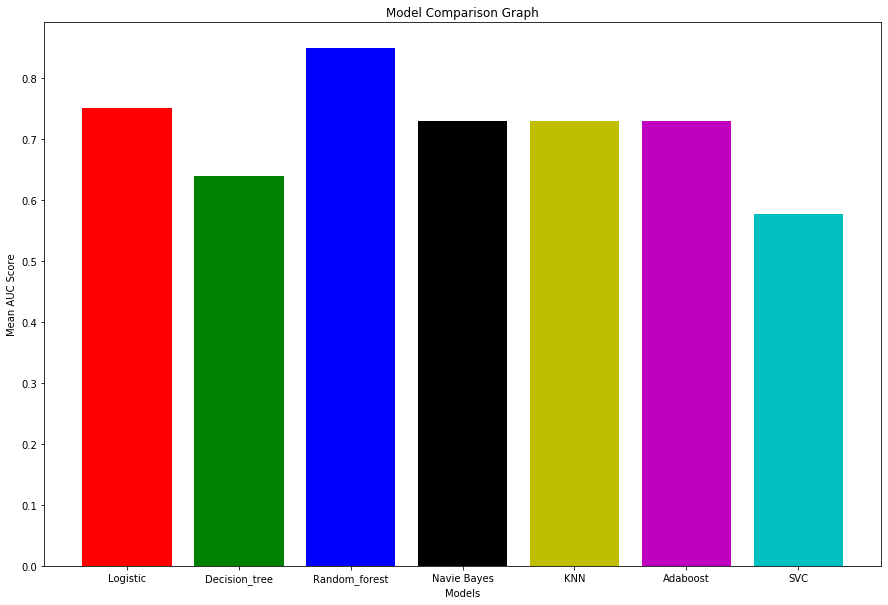

In [89]:
x1 = ['Logistic','Decision_tree','Random_forest','Navie Bayes','KNN','Adaboost','SVC']
y1=[Logistic_cv_score.mean(),decision_tree_cv_score.mean(),rfc_cv_score.mean(),navie_cv_score.mean(),
    KNN_cv_score.mean(),adaboost_cv_score.mean(),svm_cv_score.mean()]

plt.subplots(figsize=(15,10))
plt.bar(x1,y1,label ='', color='rgbkymc')
plt.xlabel('Models')
plt.ylabel('Mean AUC Score')
plt.title('Model Comparison Graph')
plt.show()